<a href="https://colab.research.google.com/github/carlosdaniellopezgordillo/Proceso_CRISP_DM/blob/main/Analisis_del_clima_pp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nuestro equipo Recopilo datos del sitema aojolote ,inegi ,conagua y de la estacion meteorologica del aureopuerto Benito Juarez, apartir de estos, creamos nuestra base de datos para su analisis, los cuales enlistare.
los analisis que se llevaran acabo son los suigientes:

-Análisis de tendencias históricas (temperatura mínima, media y máxima a lo largo del tiempo).objetivo: Ver las tendencias que a tenido el clima alo largo de los años

-Proyecciones futuras basadas en los patrones de años anteriores.
objetivo: Predecir temperaturas futuras

-Análisis de variabilidad estacional
objetivo: Ver cómo varían las temperaturas a lo largo del año (por meses) en diferentes años.

-Detección de anomalías o eventos extremos
Objetivo : Identificar temperaturas extremadamente altas o bajas en el registro.

-Comparación entre estaciones
objetivo: Ver cómo ha cambiado la diferencia entre la temperatura mínima y máxima.

-Análisis de evaluación entre meses o años
Objetivo : Ver si existe algún patrón de fijación entre los meses de un año o entre los diferentes años.

-Clusterización por patrones de temperatura
 Agrupar años con patrones de temperatura similares.

In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
!pip install odfpy
!pip install openpyxl

In [ ]:
# Opción para cargar el archivo desde la laptop
from google.colab import files
uploaded = files.upload()


Saving Temperatura Historica de la CDMX por Carlos Daniel.xlsx to Temperatura Historica de la CDMX por Carlos Daniel.xlsx


In [ ]:
# Cargar el archivo ODS
file_name = list(uploaded.keys())[0]  # Tomamos el nombre del archivo subido


In [ ]:
file_name = list(uploaded.keys())[0]  # Tomamos el nombre del archivo subido

# Check file extension to determine engine
if file_name.endswith('.ods'):
  engine = 'odf'  # Use odf engine for ODS files
elif file_name.endswith(('.xls', '.xlsx')):
  engine = 'openpyxl' # Use openpyxl engine for XLSX or XLS files
else:
  raise ValueError("Unsupported file format. Please upload an ODS, XLS, or XLSX file.")

# Read the file using the appropriate engine
df = pd.read_excel(file_name, engine=engine)

print(df.head()) # Display the first few rows of the dataframe for verification

    AÑ0  MES  T. Minima  T.Media  T.Maxima
0  2024    1        6.0     17.0      27.0
1  2023    1        3.0     17.0      28.0
2  2022    1        6.0     15.0      25.0
3  2021    1        4.0     16.0      26.0
4  2020    1        3.0     15.0      24.0


In [ ]:
# Renombramos las columnas para facilitar el acceso
df.columns = ['Year', 'Month', 'Min_Temp', 'Avg_Temp', 'Max_Temp']

In [ ]:
df.tail(10)

,Year,Month,Min_Temp,Avg_Temp,Max_Temp
410,1999,12,0.0,12.0,24.0
411,1998,12,2.0,14.0,25.0
412,1997,12,3.0,16.0,26.0
413,1996,12,3.0,14.0,24.0
414,1995,12,4.0,15.0,26.0
415,1994,12,4.0,15.0,24.0
416,1993,12,2.0,14.0,26.0
417,1992,12,0.0,15.0,25.0
418,1991,12,3.0,15.0,26.0
419,1990,12,1.0,14.0,25.0


In [ ]:
# Agrupar por año y calcular las medias de cada tipo de temperatura
annual_avg_temps = df.groupby('Year').mean()

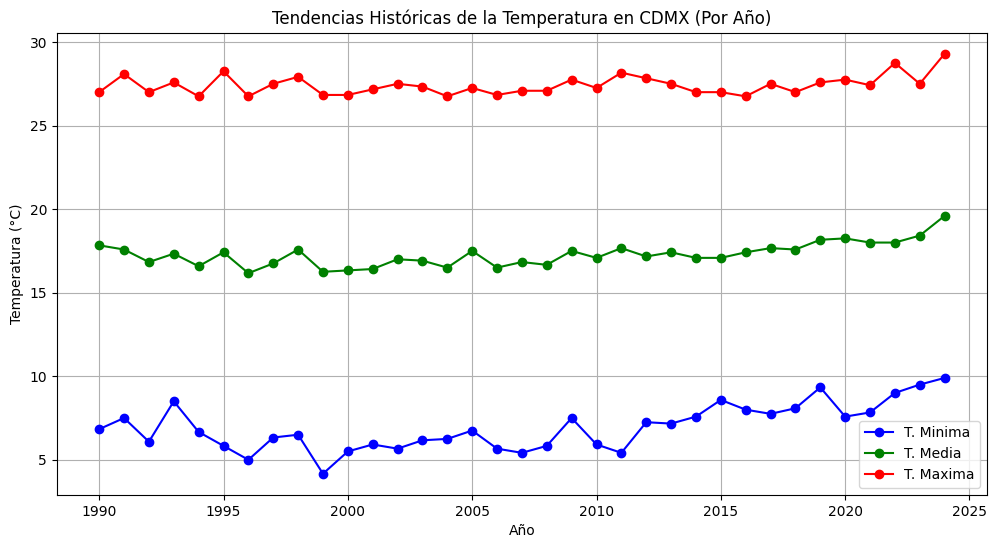

In [ ]:
# Visualización 1: Tendencias históricas de la temperatura
plt.figure(figsize=(12, 6))
plt.plot(annual_avg_temps.index, annual_avg_temps['Min_Temp'], label='T. Minima', color='blue', marker='o')
plt.plot(annual_avg_temps.index, annual_avg_temps['Avg_Temp'], label='T. Media', color='green', marker='o')
plt.plot(annual_avg_temps.index, annual_avg_temps['Max_Temp'], label='T. Maxima', color='red', marker='o')
plt.title('Tendencias Históricas de la Temperatura en CDMX (Por Año)')
plt.xlabel('Año')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Análisis de regresión lineal para proyecciones futuras
years = np.array(annual_avg_temps.index).reshape(-1, 1)

In [ ]:
years

array([[1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021],
       [2022],
       [2023],
       [2024]])

In [ ]:
# Crear modelos de regresión lineal para cada tipo de temperatura
min_model = LinearRegression().fit(years, annual_avg_temps['Min_Temp'])
avg_model = LinearRegression().fit(years, annual_avg_temps['Avg_Temp'])
max_model = LinearRegression().fit(years, annual_avg_temps['Max_Temp'])


Objetivos (Para cada caso)
1.- Medir errores Error cuadratico medio (SME), raiz Error cuadratico medio (RSME) y el coeficiente de determinacion.

Metricas
https://miguelevangelista.gitbook.io/mineria-de-datos/tecnicas-de-mineria-de-datos/regresion/regresion-lineal/metricas

Ejemplo Uber
https://miguelevangelista.gitbook.io/mineria-de-datos/tecnicas-de-mineria-de-datos/regresion/regresion-lineal/regresion-lineal-multiple/ejemplos/eta-de-uber-sklearn

2.- Determinar si la regresion lineal es lo deacuado.

3.- Realizar una RRN (red neuronal recurrente) Si da tiempo
https://miguelevangelista.gitbook.io/inteligencia-artificial/redes-neronales-recurrentes/introduccion

In [ ]:
future_years

array([[2025],
       [2026],
       [2027],
       [2028],
       [2029],
       [2030],
       [2031],
       [2032],
       [2033],
       [2034]])

In [ ]:
# Predicción de las temperaturas futuras (próximos 10 años)
future_years = np.arange(2025, 2035).reshape(-1, 1)
future_min_temps = min_model.predict(future_years)
future_avg_temps = avg_model.predict(future_years)
future_max_temps = max_model.predict(future_years)

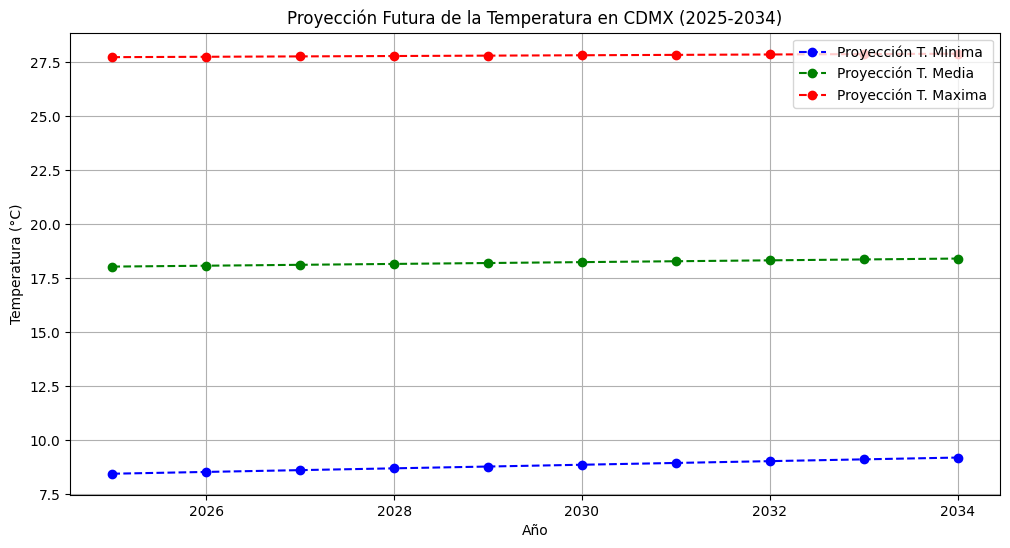

In [ ]:
# Visualización 2: Proyección futura de las temperaturas
plt.figure(figsize=(12, 6))
plt.plot(future_years, future_min_temps, label='Proyección T. Minima', color='blue', linestyle='--', marker='o')
plt.plot(future_years, future_avg_temps, label='Proyección T. Media', color='green', linestyle='--', marker='o')
plt.plot(future_years, future_max_temps, label='Proyección T. Maxima', color='red', linestyle='--', marker='o')
plt.title('Proyección Futura de la Temperatura en CDMX (2025-2034)')
plt.xlabel('Año')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()

### Test

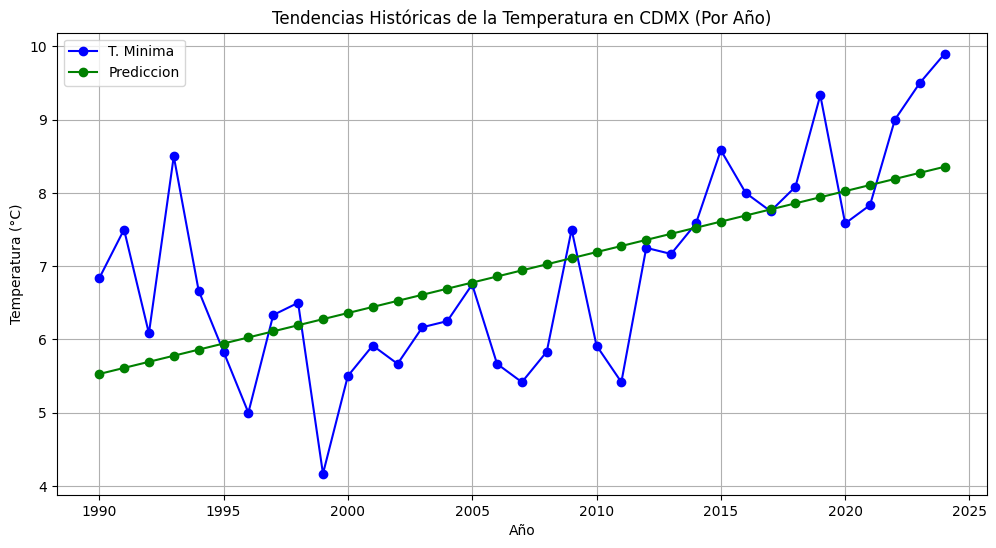

In [ ]:
future_min_temps = min_model.predict(years)

# Visualización 1: Tendencias históricas de la temperatura
plt.figure(figsize=(12, 6))
plt.plot(annual_avg_temps.index, annual_avg_temps['Min_Temp'], label='T. Minima', color='blue', marker='o')
plt.plot(annual_avg_temps.index, future_min_temps, label='Prediccion', color='green', marker='o')
plt.title('Tendencias Históricas de la Temperatura en CDMX (Por Año)')
plt.xlabel('Año')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()

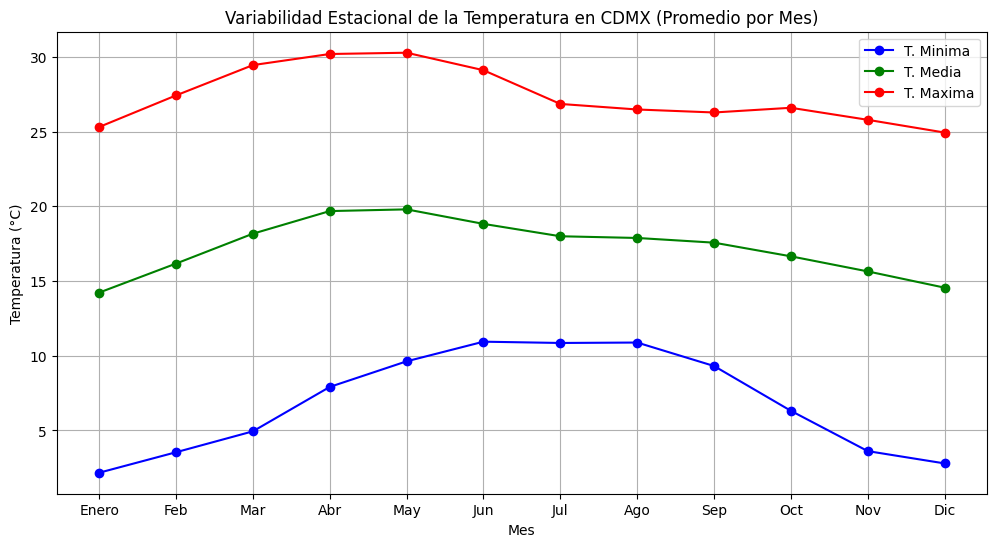

In [ ]:
# Visualización de la variabilidad estacional (por mes) a lo largo de los años
monthly_avg_temps = df.groupby('Month').mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_temps.index, monthly_avg_temps['Min_Temp'], label='T. Minima', color='blue', marker='o')
plt.plot(monthly_avg_temps.index, monthly_avg_temps['Avg_Temp'], label='T. Media', color='green', marker='o')
plt.plot(monthly_avg_temps.index, monthly_avg_temps['Max_Temp'], label='T. Maxima', color='red', marker='o')
plt.title('Variabilidad Estacional de la Temperatura en CDMX (Promedio por Mes)')
plt.xlabel('Mes')
plt.ylabel('Temperatura (°C)')
plt.xticks(np.arange(1, 13), ['Enero', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Calcular la desviación estándar y detectar anomalías
temp_std = df[['Min_Temp', 'Avg_Temp', 'Max_Temp']].std()
temp_mean = df[['Min_Temp', 'Avg_Temp', 'Max_Temp']].mean()

# Establecer umbrales de anomalía (2 desviaciones estándar)
anomaly_thresholds = {
    'Min_Temp': (temp_mean['Min_Temp'] - 2*temp_std['Min_Temp'], temp_mean['Min_Temp'] + 2*temp_std['Min_Temp']),
    'Avg_Temp': (temp_mean['Avg_Temp'] - 2*temp_std['Avg_Temp'], temp_mean['Avg_Temp'] + 2*temp_std['Avg_Temp']),
    'Max_Temp': (temp_mean['Max_Temp'] - 2*temp_std['Max_Temp'], temp_mean['Max_Temp'] + 2*temp_std['Max_Temp'])
}

# Detectar anomalías
anomalies = df[(df['Min_Temp'] < anomaly_thresholds['Min_Temp'][0]) | (df['Min_Temp'] > anomaly_thresholds['Min_Temp'][1]) |
               (df['Avg_Temp'] < anomaly_thresholds['Avg_Temp'][0]) | (df['Avg_Temp'] > anomaly_thresholds['Avg_Temp'][1]) |
               (df['Max_Temp'] < anomaly_thresholds['Max_Temp'][0]) | (df['Max_Temp'] > anomaly_thresholds['Max_Temp'][1])]

# Mostrar las anomalías
print("Anomalías detectadas en las temperaturas:")
print(anomalies)


Anomalías detectadas en las temperaturas:
     Year  Month  Min_Temp  Avg_Temp  Max_Temp
6    2018      1      -1.0      13.0      25.0
10   2014      1       1.0      12.0      24.0
18   2006      1       0.0      13.0      24.0
20   2004      1       1.0      13.0      24.0
21   2003      1       0.0      13.0      25.0
24   2000      1       0.0      13.0      25.0
25   1999      1       0.0      13.0      24.0
26   1998      1       0.0      13.0      25.0
27   1997      1       0.0      13.0      24.0
28   1996      1       0.0      13.0      25.0
81   2013      3      -2.0      17.0      28.0
104  1990      3       6.0      24.0      29.0
105  2024      4       8.0      22.0      33.0
106  2023      4      13.0      23.0      33.0
140  2024      5      13.0      24.0      34.0
142  2022      5      11.0      22.0      32.0
145  2019      5      11.0      22.0      30.0
153  2011      5       7.0      22.0      33.0
162  2002      5       7.0      20.0      33.0
166  1998      5  

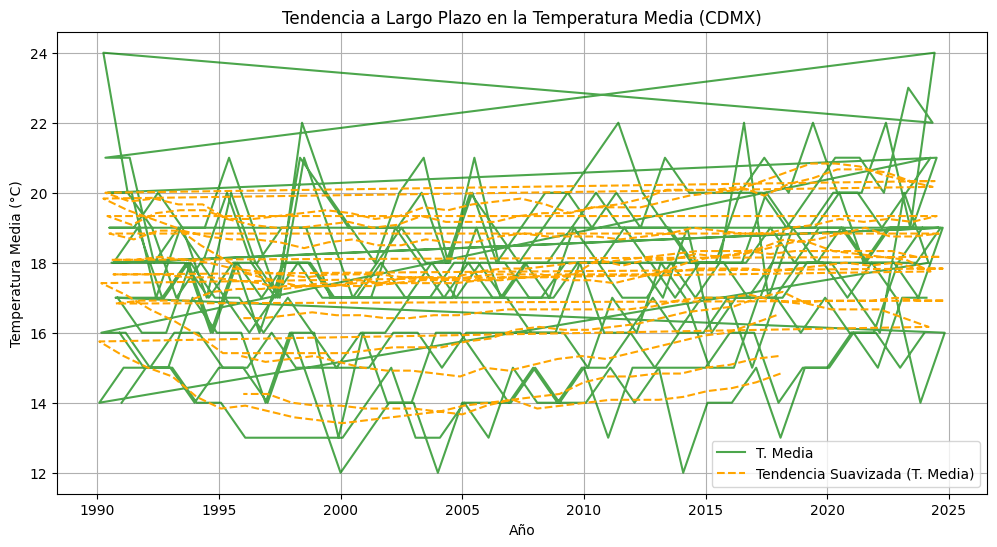

In [ ]:
# Visualización de tendencias a largo plazo con suavizado
plt.figure(figsize=(12, 6))
df['Year_Month'] = df['Year'] + df['Month'] / 12  # Crear una escala temporal continua
plt.plot(df['Year_Month'], df['Avg_Temp'], label='T. Media', color='green', alpha=0.7)

# Suavizado con promedio móvil
df['Smoothed_Avg_Temp'] = df['Avg_Temp'].rolling(window=12, center=True).mean()
plt.plot(df['Year_Month'], df['Smoothed_Avg_Temp'], label='Tendencia Suavizada (T. Media)', color='orange', linestyle='--')

plt.title('Tendencia a Largo Plazo en la Temperatura Media (CDMX)')
plt.xlabel('Año')
plt.ylabel('Temperatura Media (°C)')
plt.legend()
plt.grid(True)
plt.show()


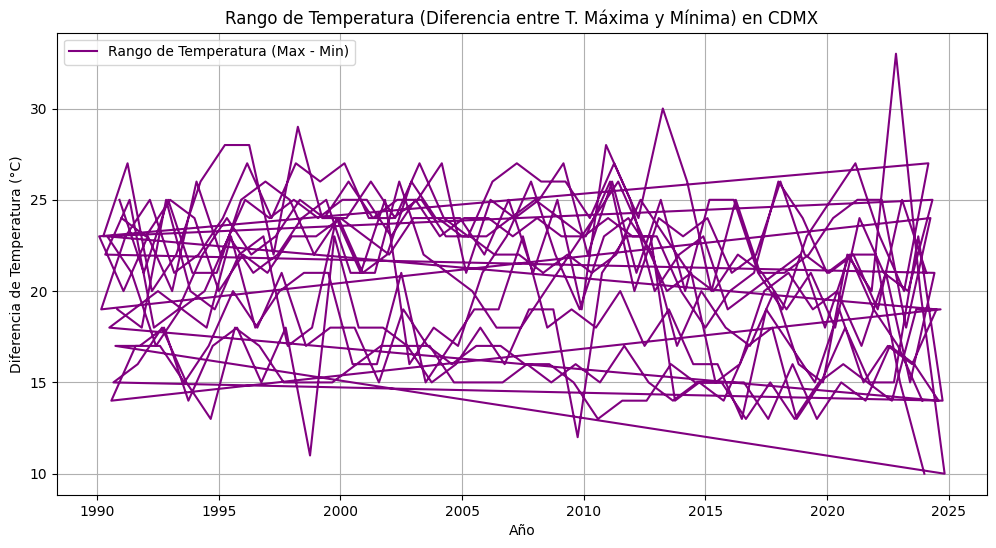

In [ ]:
# Calcular la diferencia entre la temperatura máxima y mínima
df['Temp_Range'] = df['Max_Temp'] - df['Min_Temp']

# Visualización de la diferencia entre T. Mínima y T. Máxima a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df['Year_Month'], df['Temp_Range'], label='Rango de Temperatura (Max - Min)', color='purple')
plt.title('Rango de Temperatura (Diferencia entre T. Máxima y Mínima) en CDMX')
plt.xlabel('Año')
plt.ylabel('Diferencia de Temperatura (°C)')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
df.Year_Month

,Year_Month
0,2024.083333
1,2023.083333
2,2022.083333
3,2021.083333
4,2020.083333
...,...
415,1995.000000
416,1994.000000
417,1993.000000
418,1992.000000


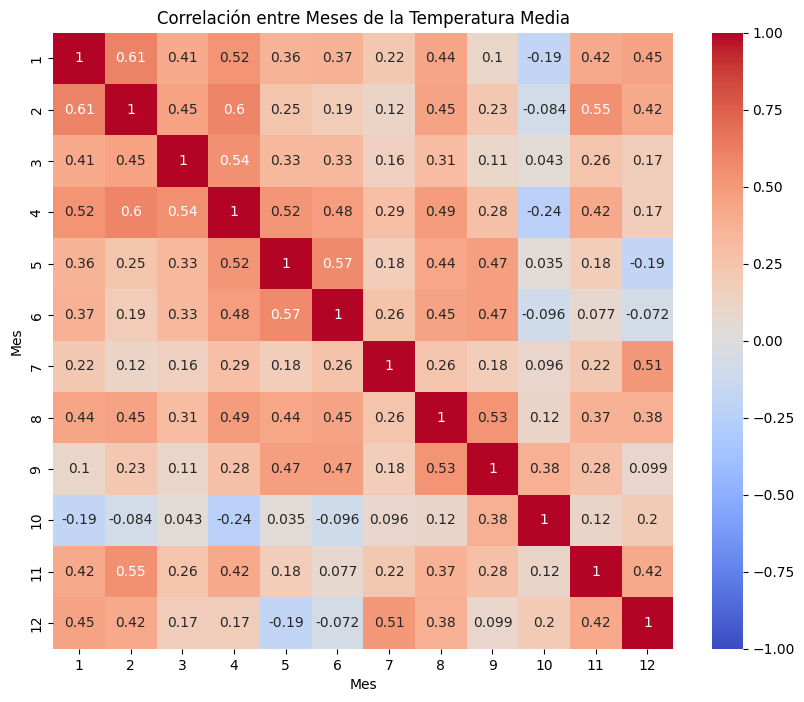

In [ ]:
# Correlación entre las temperaturas de meses consecutivos
monthly_corr = df.pivot_table(index='Year', columns='Month', values='Avg_Temp').corr()

# Visualización con mapa de calor
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(monthly_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación entre Meses de la Temperatura Media')
plt.xlabel('Mes')
plt.ylabel('Mes')
plt.show()


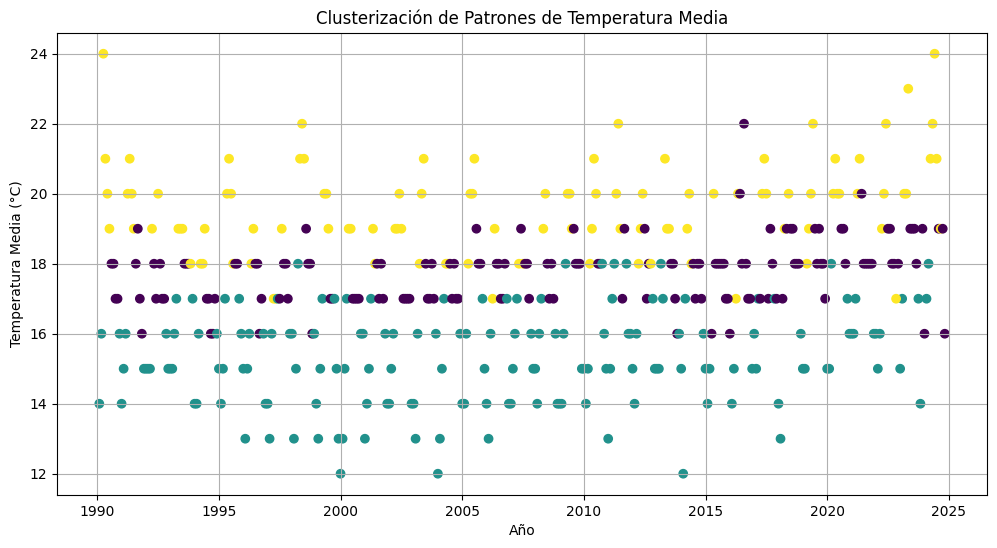

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd # Assuming you're using pandas for df

# Preparar los datos para el clustering
X = df[['Min_Temp', 'Avg_Temp', 'Max_Temp']].values

# Check for NaN values and replace with the mean of the column
# np.isnan(X) creates a boolean mask where True indicates a NaN value
# np.where locates the indices where the condition is True
# np.nanmean calculates the mean ignoring NaNs
for i in range(X.shape[1]):  # Iterate through columns of X
    nan_indices = np.where(np.isnan(X[:, i]))[0] # Find indices of NaNs in the column
    if nan_indices.size > 0: # If any NaNs are found
        column_mean = np.nanmean(X[:, i]) # Calculate column mean ignoring NaNs
        X[nan_indices, i] = column_mean # Replace NaNs with column mean


# Definir el número de clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Añadir los clusters al DataFrame original
df['Cluster'] = kmeans.labels_

# Visualización de los clusters
plt.figure(figsize=(12, 6))
plt.scatter(df['Year_Month'], df['Avg_Temp'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('Clusterización de Patrones de Temperatura Media')
plt.xlabel('Año')
plt.ylabel('Temperatura Media (°C)')
plt.grid(True)
plt.show()

In [ ]:
!pip install prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxuq3ymlh/z4vcwdnw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxuq3ymlh/rgp85w_t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96219', 'data', 'file=/tmp/tmpxuq3ymlh/z4vcwdnw.json', 'init=/tmp/tmpxuq3ymlh/rgp85w_t.json', 'output', 'file=/tmp/tmpxuq3ymlh/prophet_modeleb_aio1j/prophet_model-20241021140340.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:03:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:03:40 - cmdstanpy - INFO - Chain

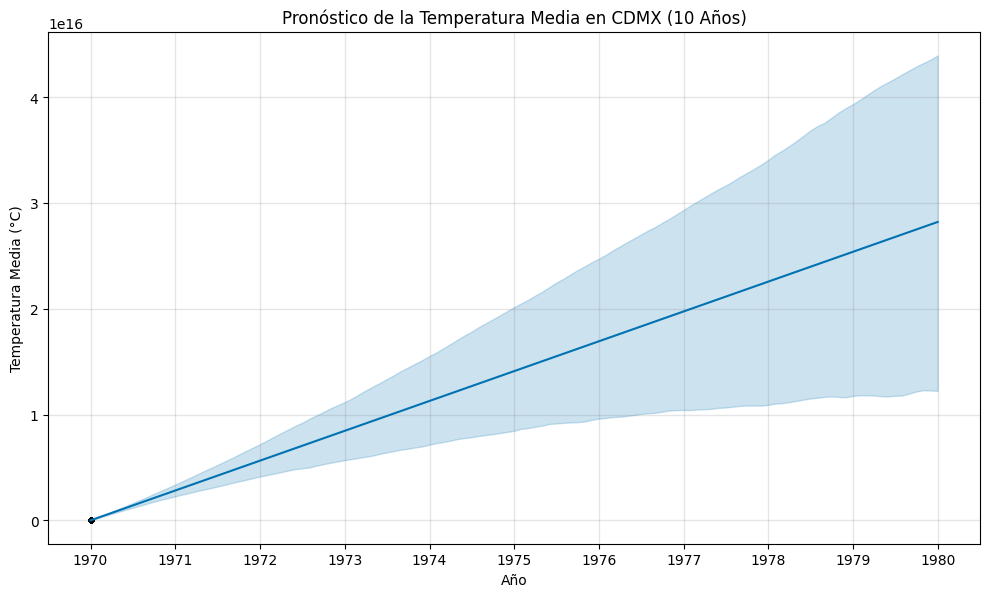

In [ ]:
# Install Prophet library using pip
!pip install prophet

# Import Prophet
from prophet import Prophet

# Preparar los datos para Prophet
df_prophet = df[['Year_Month', 'Avg_Temp']].rename(columns={'Year_Month': 'ds', 'Avg_Temp': 'y'})

# Crear el modelo y ajustarlo
model = Prophet()
model.fit(df_prophet)

# Hacer predicciones a futuro (10 años)
future = model.make_future_dataframe(periods=120, freq='M')  # 120 meses (10 años)
forecast = model.predict(future)

# Visualización de la predicción
model.plot(forecast)
plt.title('Pronóstico de la Temperatura Media en CDMX (10 Años)')
plt.xlabel('Año')
plt.ylabel('Temperatura Media (°C)')
plt.show()